In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Load the cleaned dataset
file_path = "../data/cleaned_creditcard.csv"  
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Scaling

In [7]:
scaler = MinMaxScaler()

features_to_scale = ['Time', 'Amount']

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


### Handling Outliers

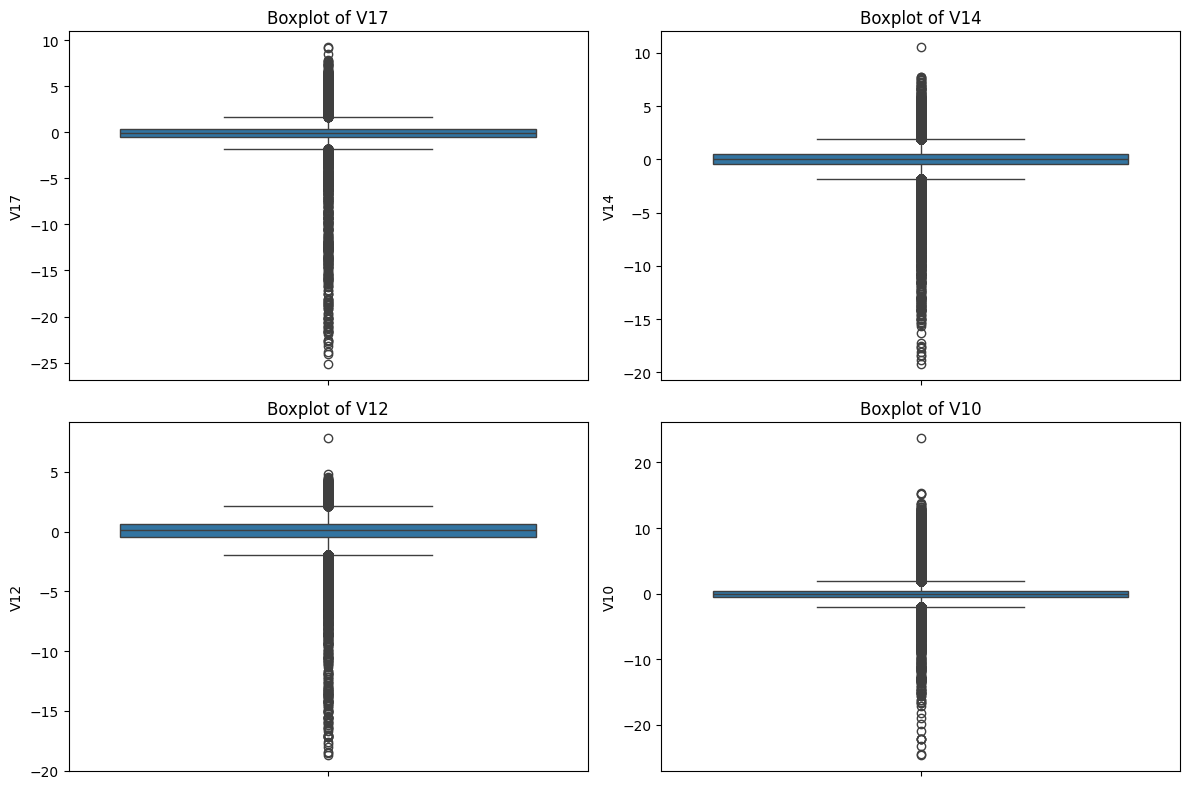

In [10]:
# Define important features to check for outliers
outlier_features = ['V17', 'V14', 'V12', 'V10']

# Create boxplots
plt.figure(figsize=(12,8))
for i, col in enumerate(outlier_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

1️. All four features (`V17`, `V14`, `V12`, `V10`) have many outliers.

    Most outliers are negative values, especially in `V17`, `V14`, and `V12`.

    `V10` has some positive outliers, but they are fewer.

2️. Fraud Transactions Are Likely in the Outliers

    From the EDA we did earlier, we know that negative values in `V17`, `V14`, and `V12` are highly correlated with fraud.

    Removing these outliers could remove fraud cases, which we don’t want.

3️. Non-Fraud Transactions Are Mostly in the Middle Range

    The majority of data points are within the box, meaning regular (legitimate) transactions don’t have extreme values.

### Compute Mutual Information

In [12]:
# Step 1: Define features (excluding 'Class')
X = df.drop(columns=['Class'])
y = df['Class']

# Step 2: Compute Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features=False)

# Step 3: Create a DataFrame to view results
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by="Mutual_Information", ascending=False)

# Step 4: Display top features
mi_scores_df.head(10)

,Feature,Mutual_Information
17,V17,0.008258
14,V14,0.008136
12,V12,0.007601
10,V10,0.007530
11,V11,0.006831
16,V16,0.006144
4,V4,0.004976
3,V3,0.004952
18,V18,0.004317
9,V9,0.004277


1️. `V17`, `V14`, `V12`, and `V10` are the most important features

    This matches our previous findings from EDA! 🚀
    
    These features have the highest MI scores (~0.008), meaning they provide the most useful information for fraud detection.

2️. Other useful features include `V11`, `V16`, `V4`, `V3`, `V18`, and `V9`

    Their MI scores are slightly lower but still relevant.

3️. Features not in the top 10 might not contribute much

    Lower MI scores suggest some features may not be very useful.

### Drop Low-Importance Features

In [13]:
# Define top 10 most important features based on Mutual Information
selected_features = ['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9', 'Amount', 'Time', 'Class']

# Keep only these features
df = df[selected_features]

# Display updated dataset
df.head()

,V17,V14,V12,V10,V11,V16,V4,V3,V18,V9,Amount,Time,Class
0,0.207971,-0.311169,-0.617801,0.090794,-0.551600,-0.470401,1.378155,2.536347,0.025791,0.363787,0.005824,0.000000,0
1,-0.114805,-0.143772,1.065235,-0.166974,1.612727,0.463917,0.448154,0.166480,-0.183361,-0.255425,0.000105,0.000000,0
2,1.109969,-0.165946,0.066084,0.207643,0.624501,-2.890083,0.379780,1.773209,-0.121359,-1.514654,0.014739,0.000006,0
3,-0.684093,-0.287924,0.178228,-0.054952,-0.226487,-1.059647,-0.863291,1.792993,1.965775,-1.387024,0.004807,0.000006,0
4,-0.237033,-1.119670,0.538196,0.753074,-0.822843,-0.451449,0.403034,1.548718,-0.038195,0.817739,0.002724,0.000012,0


##  Model Training & Evaluation

In [15]:
# Step 1: Define X (features) and y (target)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Step 2: Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 12), (56962, 12), (227845,), (56962,))

In [17]:
# Check class distribution in training and testing sets
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True) * 100)

Class distribution in y_train:
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Class distribution in y_test:
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


### Handling Imbalanced Data

In [19]:
# Step 1: Initialize SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Adjust the ratio as needed

# Step 2: Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Check the new class distribution
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts(normalize=True) * 100)

Class distribution after SMOTE:
Class
0    83.333394
1    16.666606
Name: proportion, dtype: float64


f:\AI Data Projects\Fintech Projects\Credit_Card_Fraud_Detection\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Model Training & Evaluation

In [21]:
# Step 1: Initialize Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Step 2: Train the model on SMOTE-resampled data
log_reg.fit(X_train_smote, y_train_smote)

# Step 3: Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Step 4: Evaluate performance
print("Model Performance (Logistic Regression):")
print(classification_report(y_test, y_pred))

Model Performance (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



1️. Fraud Detection (Class = 1 - Minority Class)
    
    Precision: 0.05 → Very low 🚨
    
        This means when the model predicts a transaction as fraud, it’s correct only 5% of the time.
    
        Too many false positives (misclassifying legit transactions as fraud).
    
    Recall: 0.92 → Very high ✅

        The model correctly identifies 92% of fraud cases!

        This means SMOTE helped reduce false negatives (missed fraud cases).

    F1-score: 0.10 → Low (due to poor precision).

2️. Legitimate Transactions (Class = 0 - Majority Class)

    Precision: 1.00 → Almost all legitimate transactions are correctly classified.
    
    Recall: 0.97 → A small percentage of legitimate transactions are misclassified as fraud.
    
    F1-score: 0.99 → Excellent performance for non-fraud cases.

In [23]:
# Step 1: Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Step 2: Train on SMOTE-resampled data
rf_model.fit(X_train_smote, y_train_smote)

# Step 3: Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate performance
print("Model Performance (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Model Performance (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



1. Fraud Detection (Class = 1 - Minority Class)
    Precision: 0.82 → Huge improvement from 0.05 in Logistic Regression!

        When the model predicts fraud, it’s correct 82% of the time (fewer false alarms).

     Recall: 0.82 → Still very high!

        The model correctly finds 82% of all fraud cases.
    
     F1-score: 0.82 → Balanced between precision & recall.

        This means the model is detecting fraud well without too many false positives.

2. Legitimate Transactions (Class = 0 - Majority Class)
   
   Precision: 1.00 → Almost no false positives for legit transactions.
   
   Recall: 1.00 → The model correctly classifies almost all legitimate transactions

### Feature Importance Analysis

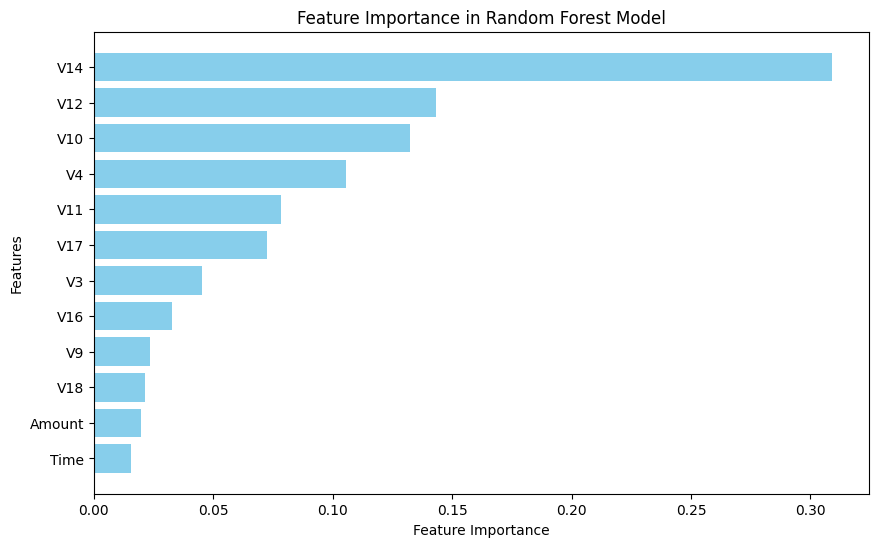

In [24]:
# Step 1: Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Step 2: Create a DataFrame for visualization
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 3: Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

The model is learning patterns well, since the most important features match what we expected.

We don’t need to remove more features, since the top 10+ are useful.

Hyperparameter tuning might help improve performance further.

### Hyperparameter Tuning with GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of each tree
    'min_samples_split': [2, 5],  # Min samples to split a node
    'min_samples_leaf': [1, 2],  # Min samples per leaf
    'class_weight': ['balanced']  # Handling class imbalance
}

# Step 2: Initialize GridSearchCV with Random Forest
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, 
                           scoring='f1',  # Optimizing for F1-score
                           cv=3,  # 3-fold cross-validation
                           verbose=2, 
                           n_jobs=-1)

# Step 3: Run GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Step 4: Display best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Step 5: Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Step 6: Print performance
print("Optimized Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



1. Best Hyperparameters Found:

    class_weight: 'balanced' (keeps fraud detection fair).
    
    max_depth: None (allows trees to grow fully).
    
    min_samples_leaf: 1 (allows small splits for better learning).
    
    min_samples_split: 2 (default, ensures sufficient splits).
    
    n_estimators: 200 (uses more trees for better stability).

2. Model Performance on Fraud Detection (Class = 1)

    Precision: 0.82 → Same as before, meaning false alarms are controlled.

    Recall: 0.83 → Slightly improved! Model is catching 83% of fraud cases.

    F1-score: 0.82 → Balanced fraud detection.

3. Legitimate Transactions (Class = 0)

    Perfect Precision & Recall (1.00) → Model is never falsely labeling legit transactions as fraud.

In [26]:
import joblib

# Step 1: Save the trained model
model_filename = "../models/fraud_detection_model.pkl"  # Save inside 'models/' folder
joblib.dump(best_rf, model_filename)

print(f"Model saved to {model_filename}")

Model saved to ../models/fraud_detection_model.pkl
